In [5]:
# import all the required libraries and dependencies for dataframe

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as plticker
%matplotlib inline

# import all the required libraries and dependencies for machine learning

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import statsmodels.api as sm
import pickle
import gc 
from sklearn import svm
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [11]:
path ='/Users/krishanbhanot/Downloads/creditcard.csv'

In [12]:
# Reading the Credit Card file on which analysis needs to be done

df_card = pd.read_csv(path)
df_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


In [13]:
# Shape of the Credit card dataframe

df_card.shape

(284807, 31)

In [14]:
# Data Description

df_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000
mean,94813.8596,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,88.3496,0.0017
std,47488.1460,1.9587,1.6513,1.5163,1.4159,1.3802,1.3323,1.2371,1.1944,1.0986,1.0888,1.0207,0.9992,0.9953,0.9586,0.9153,0.8763,0.8493,0.8382,0.8140,0.7709,0.7345,0.7257,0.6245,0.6056,0.5213,0.4822,0.4036,0.3301,250.1201,0.0415
min,0.0000,-56.4075,-72.7157,-48.3256,-5.6832,-113.7433,-26.1605,-43.5572,-73.2167,-13.4341,-24.5883,-4.7975,-18.6837,-5.7919,-19.2143,-4.4989,-14.1299,-25.1628,-9.4987,-7.2135,-54.4977,-34.8304,-10.9331,-44.8077,-2.8366,-10.2954,-2.6046,-22.5657,-15.4301,0.0000,0.0000
25%,54201.5000,-0.9204,-0.5985,-0.8904,-0.8486,-0.6916,-0.7683,-0.5541,-0.2086,-0.6431,-0.5354,-0.7625,-0.4056,-0.6485,-0.4256,-0.5829,-0.4680,-0.4837,-0.4988,-0.4563,-0.2117,-0.2284,-0.5424,-0.1618,-0.3546,-0.3171,-0.3270,-0.0708,-0.0530,5.6000,0.0000
50%,84692.0000,0.0181,0.0655,0.1798,-0.0198,-0.0543,-0.2742,0.0401,0.0224,-0.0514,-0.0929,-0.0328,0.1400,-0.0136,0.0506,0.0481,0.0664,-0.0657,-0.0036,0.0037,-0.0625,-0.0295,0.0068,-0.0112,0.0410,0.0166,-0.0521,0.0013,0.0112,22.0000,0.0000
75%,139320.5000,1.3156,0.8037,1.0272,0.7433,0.6119,0.3986,0.5704,0.3273,0.5971,0.4539,0.7396,0.6182,0.6625,0.4931,0.6488,0.5233,0.3997,0.5008,0.4589,0.1330,0.1864,0.5286,0.1476,0.4395,0.3507,0.2410,0.0910,0.0783,77.1650,0.0000
max,172792.0000,2.4549,22.0577,9.3826,16.8753,34.8017,73.3016,120.5895,20.0072,15.5950,23.7451,12.0189,7.8484,7.1269,10.5268,8.8777,17.3151,9.2535,5.0411,5.5920,39.4209,27.2028,10.5031,22.5284,4.5845,7.5196,3.5173,31.6122,33.8478,25691.1600,1.0000


In [15]:
# Data Information

df_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
# Calculating the Missing Value% in the DF

df_null = df_card.isnull().mean()*100
df_null.sort_values(ascending=False).head()

Time     0.0000
V16      0.0000
Amount   0.0000
V28      0.0000
V27      0.0000
dtype: float64

In [17]:
# Datatype check for the dataframe

df_card.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     int64  
dtype: object

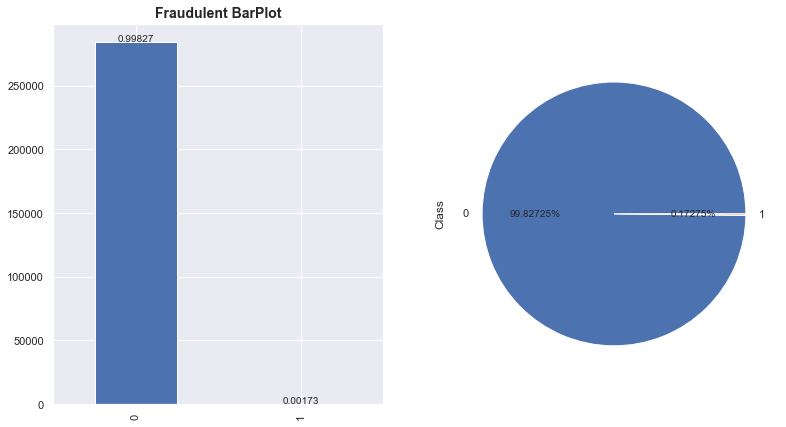

In [18]:
plt.figure(figsize=(13,7))
plt.subplot(121)
plt.title('Fraudulent BarPlot', fontweight='bold',fontsize=14)
ax = df_card['Class'].value_counts().plot(kind='bar')
total = float(len(df_card))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.5f}'.format(height/total),
            ha="center") 


plt.subplot(122)
df_card["Class"].value_counts().plot.pie(autopct = "%1.5f%%")
plt.show()


In [19]:
classes=df_card['Class'].value_counts()
normal_share=classes[0]/df_card['Class'].count()*100
fraud_share=classes[1]/df_card['Class'].count()*100
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


[None, None, None, None]

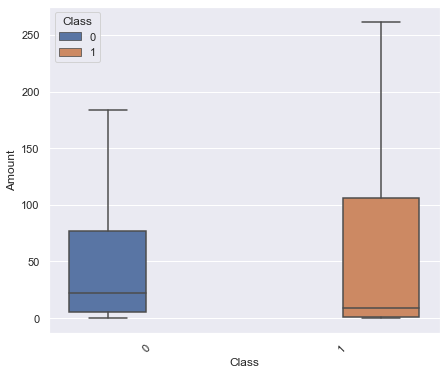

In [20]:
# Box Plot of amount for both classes
plt.figure(figsize = (7, 6))
a=sns.boxplot(x = 'Class', y = 'Amount',hue='Class', data = df_card,showfliers=False) 
plt.setp(a.get_xticklabels(), rotation=45)

Text(0, 0.5, 'Density')

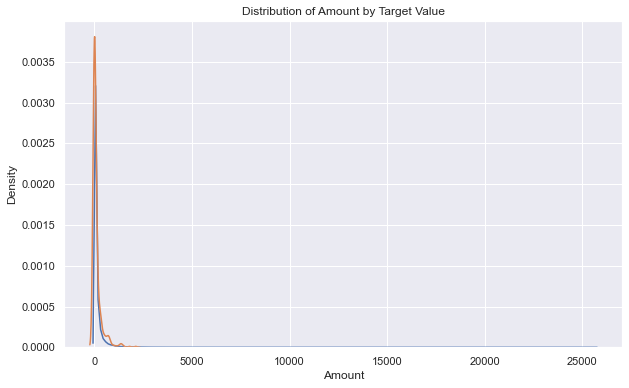

In [21]:
# KDE plot to visualize the distribution of Amount for both the classes
plt.rcParams['figure.figsize'] = [10,6]
sns.kdeplot(df_card.loc[df_card['Class'] == 0, 'Amount'], label = 'Non Fraud')
sns.kdeplot(df_card.loc[df_card['Class'] == 1, 'Amount'], label = 'Fraud')
plt.title('Distribution of Amount by Target Value')
plt.xlabel('Amount')
plt.ylabel('Density')

<AxesSubplot:title={'center':'Distribution of Transaction Time'}, ylabel='Density'>

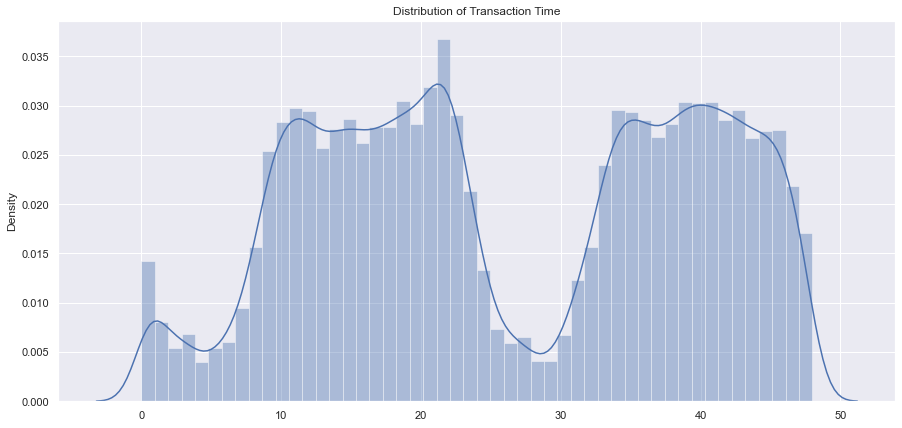

In [22]:
# Time Distribution plot for transactions 
plt.figure(figsize=(15,7))

plt.title('Distribution of Transaction Time')
sns.distplot(df_card['Time'].values/(60*60))


In [23]:
# Storing Fraud and non-Fraud transactions 

df_nonfraud = df_card[df_card.Class == 0]
df_fraud = df_card[df_card.Class == 1]

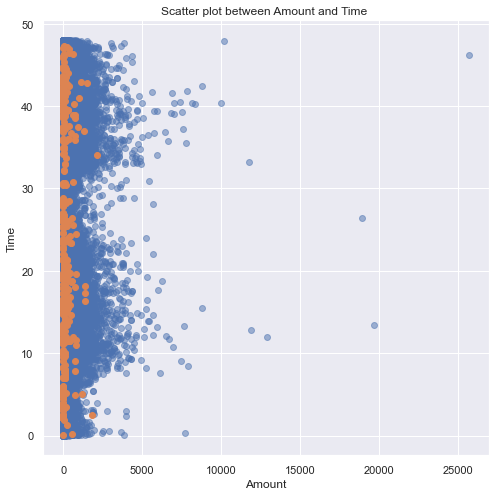

In [24]:
#Scatter plot between Time and Amount

fig = plt.figure(figsize = (8,8))
plt.scatter(df_nonfraud.Amount, df_nonfraud.Time.values/(60*60),alpha=0.5,label='Non Fraud')
plt.scatter(df_fraud.Amount, df_fraud.Time.values/(60*60),alpha=1,label='Fraud')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title('Scatter plot between Amount and Time ')
plt.show()

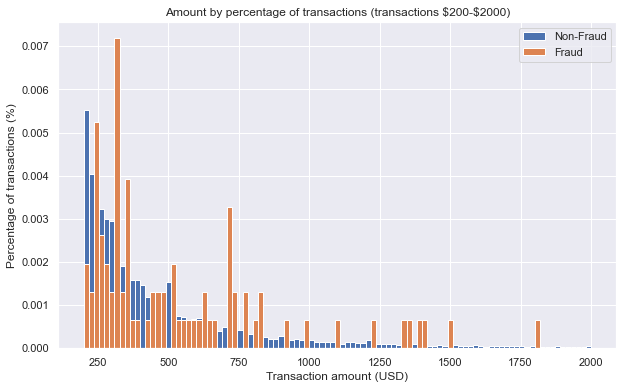

In [25]:
# Plot of high value transactions($200-$2000)

bins = np.linspace(200, 2000, 100)
plt.hist(df_nonfraud.Amount, bins, alpha=1, density=True, label='Non-Fraud')
plt.hist(df_fraud.Amount, bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

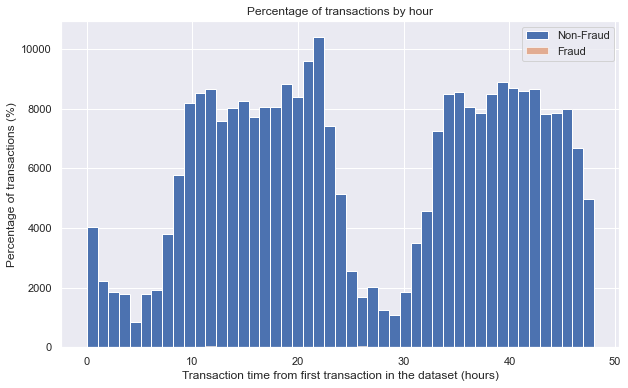

In [26]:
# Plot of transactions in 48 hours

bins = np.linspace(0, 48, 48)
plt.hist((df_nonfraud.Time/(60*60)), bins, alpha=1,label='Non-Fraud')
plt.hist((df_fraud.Time/(60*60)), bins, alpha=0.6,label='Fraud')
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time from first transaction in the dataset (hours)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

In [27]:
# Putting the feature variable into X

X = df_card.drop(['Class'],axis = 1)
X.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900


In [28]:
# Putting the Target variable to y

y = df_card['Class']

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit

In [30]:
# Splitting the data into Train and Test set
kfold = 4
sss = StratifiedShuffleSplit(n_splits=kfold, test_size=0.3, random_state=9487)
for train_index, test_index in sss.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.iloc, X.iloc
        y_train, y_test = y[train_index], y[test_index]

TRAIN: [129141  91689 118805 ... 249655  69488 188068] TEST: [ 32603  71580 144362 ... 120664 260883 146701]
TRAIN: [179661 129498 253513 ... 261021 275137 199709] TEST: [ 30193  96420  28988 ... 159837 243770  87245]
TRAIN: [ 55609 250907 105943 ...  96700  41174 261733] TEST: [ 97330 182828 138896 ... 103047 280031 252278]
TRAIN: [160541 270383   7914 ... 119570 142561 116811] TEST: [199984 152508 204491 ... 203781  88156  52492]


Text(0, 0.5, 'Count')

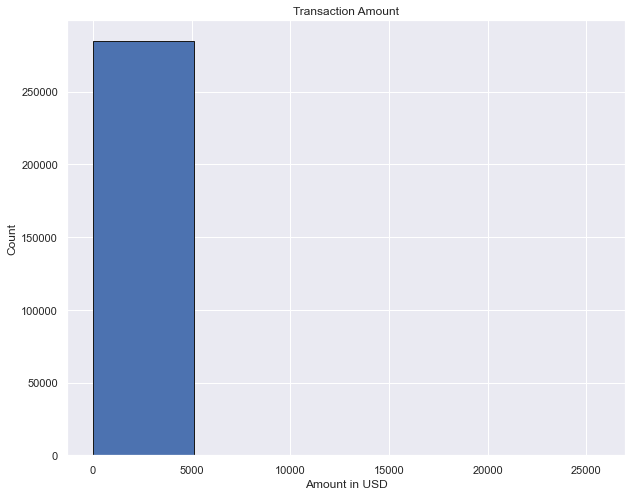

In [31]:
# Checking Skewness of data

plt.rcParams['figure.figsize'] = [10,8]
plt.hist(df_card['Amount'],edgecolor='k',bins = 5)
plt.title('Transaction Amount')
plt.xlabel('Amount in USD') 
plt.ylabel('Count')


In [32]:
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer

In [33]:
pt = preprocessing.PowerTransformer(copy=False)
PWTR_X = pt.fit_transform(X)

In [34]:
# Splitting dataset into test and train sets in 70:30 ratio after applying Power Transform

kfold = 4
sss = StratifiedShuffleSplit(n_splits=kfold, test_size=0.3, random_state=9487)
for train_index, test_index in sss.split(PWTR_X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = PWTR_X[train_index], PWTR_X[test_index]
        y_train, y_test = y[train_index], y[test_index]

TRAIN: [129141  91689 118805 ... 249655  69488 188068] TEST: [ 32603  71580 144362 ... 120664 260883 146701]
TRAIN: [179661 129498 253513 ... 261021 275137 199709] TEST: [ 30193  96420  28988 ... 159837 243770  87245]
TRAIN: [ 55609 250907 105943 ...  96700  41174 261733] TEST: [ 97330 182828 138896 ... 103047 280031 252278]
TRAIN: [160541 270383   7914 ... 119570 142561 116811] TEST: [199984 152508 204491 ... 203781  88156  52492]


In [35]:
from sklearn.linear_model import LogisticRegression

# Fit a logistic regression model to train data
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Predict on test data
y_predicted = model_lr.predict(X_test)

In [37]:
# Evaluation Metrics

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.60      0.71       148

    accuracy                           1.00     85443
   macro avg       0.93      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85280    15]
 [   59    89]]
Logistic Regression Accuracy:  0.999133925541004
ROC AUC :  0.8005877455508148


In [38]:
# Function for roc_curve
def plot_roc_curve(fpr,tpr,roc_auc):
    plt.plot(fpr, tpr, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [39]:
# tpr and fpr
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)


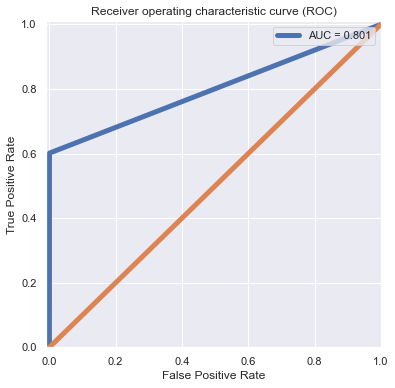

In [40]:
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

In [42]:
pip install -U imbalanced-learn

     |████████████████████████████████| 189 kB 3.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [43]:
conda install -c conda-forge imbalanced-learn

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    imbalanced-learn-0.8.1     |     pyhd8ed1ab_0         110 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         110 KB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.8.1-pyhd8ed1ab_0



imbalanced-learn-0.8 | 110 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [44]:
from imblearn.metrics import sensitivity_specificity_support

In [45]:
# Number of folds

n_folds = 5
# parameters 
params ={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

lrh = LogisticRegression()

model_lrh = GridSearchCV(estimator=lrh, cv=n_folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [46]:
# Fitting the model

model_lrh.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [47]:
pd.DataFrame(model_lrh.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.1827,0.0058,0.0000,0.0000,0.1000,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,0.6114,0.0839,0.0163,0.0021,0.1000,l2,"{'C': 0.1, 'penalty': 'l2'}",0.9696,0.9926,0.9882,0.9777,0.9740,0.9804,0.0086,1
2,0.0535,0.0154,0.0000,0.0000,0.5000,l1,"{'C': 0.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
3,0.5524,0.0484,0.0164,0.0049,0.5000,l2,"{'C': 0.5, 'penalty': 'l2'}",0.9700,0.9921,0.9864,0.9776,0.9734,0.9799,0.0082,2
4,0.0461,0.0115,0.0000,0.0000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
5,0.5624,0.0245,0.0153,0.0036,1,l2,"{'C': 1, 'penalty': 'l2'}",0.9701,0.9920,0.9861,0.9776,0.9733,0.9798,0.0081,3
6,0.0513,0.0114,0.0000,0.0000,2,l1,"{'C': 2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
7,0.6731,0.0734,0.0165,0.0037,2,l2,"{'C': 2, 'penalty': 'l2'}",0.9701,0.9920,0.9860,0.9776,0.9732,0.9798,0.0081,4
8,0.0366,0.0040,0.0000,0.0000,3,l1,"{'C': 3, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
9,0.6207,0.0543,0.0110,0.0014,3,l2,"{'C': 3, 'penalty': 'l2'}",0.9702,0.9920,0.9859,0.9776,0.9732,0.9798,0.0081,5


In [48]:
print("Logistic Regression with PCA Best AUC : ", model_lrh.best_score_)
print("Logistic Regression with PCA Best hyperparameters: ", model_lrh.best_params_)


Logistic Regression with PCA Best AUC :  0.9804184472371569
Logistic Regression with PCA Best hyperparameters:  {'C': 0.1, 'penalty': 'l2'}


In [49]:
# Passing the best parameteres
model_lrh_tuned = LogisticRegression(penalty='l2',C=0.1)

In [50]:
# Predicting on test data

model_lrh_tuned.fit(X_train,y_train)
y_predicted = model_lrh_tuned.predict(X_test)

In [51]:
#Evaluation Metrices

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.59      0.70       148

    accuracy                           1.00     85443
   macro avg       0.93      0.79      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85280    15]
 [   61    87]]
Logistic Regression Accuracy:  0.9991105181231933
ROC AUC :  0.7938309887940581


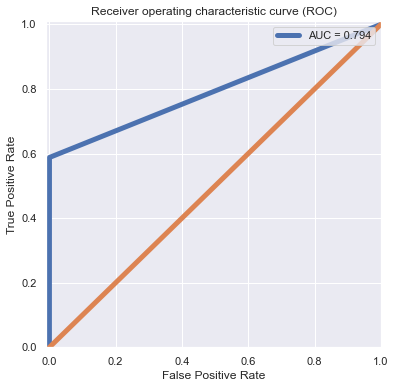

In [52]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

In [53]:
#Initializing Random forest and creating model

from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_jobs=-1, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

In [54]:
# Fitting the model on Train data and Predicting on Test data

model_rfc.fit(X_train,y_train)
y_predicted = model_rfc.predict(X_test)

In [55]:
# Evaluation Metrics

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.70      0.80       148

    accuracy                           1.00     85443
   macro avg       0.97      0.85      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85288     7]
 [   44   104]]
Logistic Regression Accuracy:  0.999403110845827
ROC AUC :  0.8513103172930829


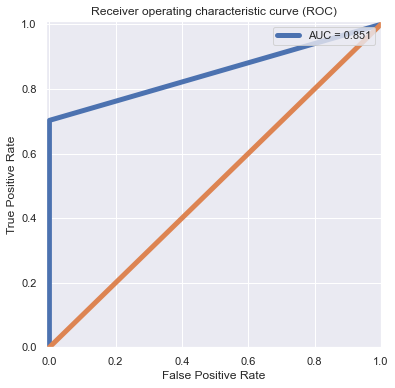

In [56]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [58]:
# Defining Parameters
params = { 
    'n_estimators': [200, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [59]:
# Stratified K Fold
cross_val = StratifiedKFold(n_splits=3)
index_iterator = cross_val.split(X_train, y_train)
clf = RandomForestClassifier()
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = params, n_iter = 50, cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [60]:
# Fitting the model on train data
# clf_random.fit(X_train, y_train)

In [61]:
# Scores of RandomizedSearchCV
#scores = clf_random.cv_results_
#pd.DataFrame(scores).head()

In [62]:
#print(clf_random.best_score_)
#print(clf_random.best_params_)
#print(clf_random.best_index_)

In [63]:
# Passing the best parameteres based on Randomized Search CV
model_rfc_tuned = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12}, # 0: non-fraud , 1:fraud
                               criterion='gini',
                               max_depth=5,
                               max_features='sqrt',
                               min_samples_leaf=10,
                               n_estimators=200,
                               n_jobs=-1, 
                               random_state=5)

In [64]:
# Fitting the model on Train data and Predicting on Test Data

model_rfc_tuned.fit(X_train,y_train)
y_predicted = model_rfc_tuned.predict(X_test)

In [65]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.81      0.71      0.76       148

    accuracy                           1.00     85443
   macro avg       0.91      0.85      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85271    24]
 [   43   105]]
Logistic Regression Accuracy:  0.9992158515033414
ROC AUC :  0.8545890415299524


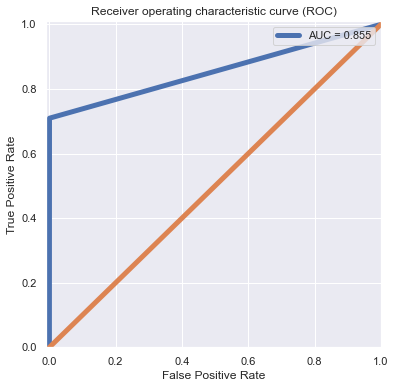

In [66]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

In [67]:
#Initializing Random forest and creating model
model_xgb = XGBClassifier()

In [68]:
# Fitting the model on Train data and Predicting on Test data
model_xgb.fit(X_train,y_train)
y_predicted = model_xgb.predict(X_test)

[23:17:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [69]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))


Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.74      0.83       148

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85289     6]
 [   38   110]]
Logistic Regression Accuracy:  0.9994850368081645
ROC AUC :  0.8715864495716773


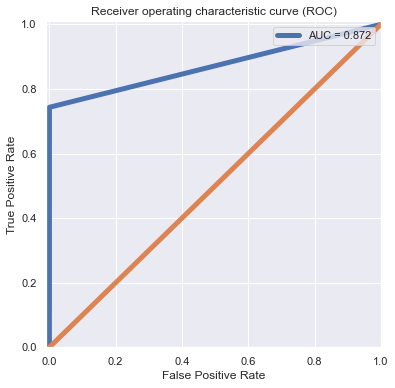

In [70]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

In [71]:
# Defining parameters
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [72]:
# Stratified K Fold
cross_val = StratifiedKFold(n_splits=5)
index_iterator = cross_val.split(X_train, y_train)


xgb_cross = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1) 


xgb_random = RandomizedSearchCV(estimator = xgb_cross, param_distributions = params, n_iter =30 , cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [73]:
# Fitting the model on train data
#xgb_random.fit(X_train, y_train)

In [74]:
# scores of RandomizedSearchCV
#scores = xgb_random.cv_results_
#pd.DataFrame(scores).head()

In [75]:
#print(xgb_random.best_score_)
#print(xgb_random.best_params_)
#print(xgb_random.best_index_)

In [76]:
# Passing the best parameteres based on Randomized Search CV
model_xgb_tuned = XGBClassifier(min_child_weight= 5,
        gamma= 1.5,
        subsample= 1.0,
        colsample_bytree= 0.6,
        max_depth= 5)

In [77]:
# Fitting the model on Train data and Predicting on Test data
model_xgb_tuned.fit(X_train,y_train)
y_predicted = model_xgb_tuned.predict(X_test)


[23:18:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [78]:
# Evaluation metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.73      0.83       148

    accuracy                           1.00     85443
   macro avg       0.98      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85290     5]
 [   40   108]]
Logistic Regression Accuracy:  0.9994733330992591
ROC AUC :  0.8648355548232446


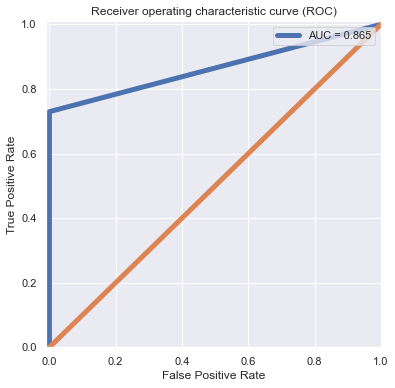

In [79]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)


In [84]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# Resample training data
ros = RandomOverSampler()
smote = SMOTE(random_state=5)
adasyn = ADASYN(random_state=5)

X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)
X_train_adasyn, y_train_adasyn =adasyn.fit_resample(X_train,y_train)

In [85]:
# Fit a logistic regression model to our data
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train_ros, y_train_ros)

# Obtain model predictions
y_predicted = model_lr.predict(X_test)

In [86]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.91      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83285  2010]
 [   14   134]]
Logistic Regression Accuracy:  0.9763116931755673
ROC AUC :  0.9409200659713585


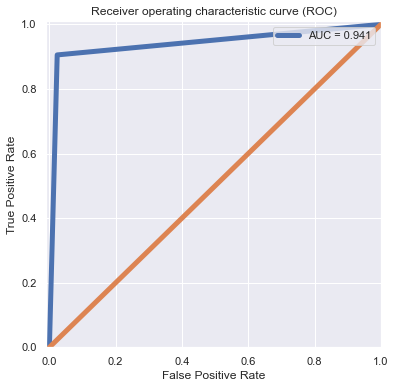

In [87]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

In [88]:
# Fit a logistic regression model to our data
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train_smote, y_train_smote)

# Obtain model predictions
y_predicted = model_lr.predict(X_test)

In [89]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.06      0.91      0.11       148

    accuracy                           0.97     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.97      0.99     85443

Confusion matrix:
 [[83076  2219]
 [   14   134]]
Logistic Regression Accuracy:  0.9738656180143488
ROC AUC :  0.9396949062316317


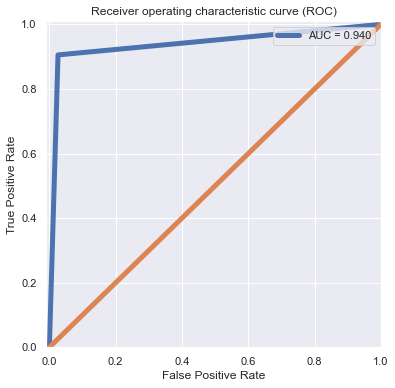

In [90]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

In [91]:
# Fit a logistic regression model to our data
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train_adasyn, y_train_adasyn)

# Obtain model predictions
y_predicted = model_lr.predict(X_test)

In [92]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     85295
           1       0.02      0.91      0.04       148

    accuracy                           0.92     85443
   macro avg       0.51      0.91      0.50     85443
weighted avg       1.00      0.92      0.95     85443

Confusion matrix:
 [[78046  7249]
 [   13   135]]
Logistic Regression Accuracy:  0.915007665929333
ROC AUC :  0.9135873827400295


In [93]:
# Insantiate Model
model_rfc = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12}, # 0: non-fraud , 1:fraud
                               criterion='entropy',
                               max_depth=10, # Change depth of model
                               min_samples_leaf=10, # Change the number of samples in leaf nodes
                               n_estimators=20, # Change the number of trees to use
                               n_jobs=-1, 
                               random_state=5)

In [94]:
# Fit the model on train data and predict on test data 
model_rfc.fit(X_train_ros,y_train_ros)
y_predicted = model_rfc.predict(X_test)

In [95]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.41      0.79      0.54       148

    accuracy                           1.00     85443
   macro avg       0.71      0.89      0.77     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85130   165]
 [   31   117]]
Logistic Regression Accuracy:  0.997706073054551
ROC AUC :  0.8943030388968017


In [96]:
# Fit the model on train data and predict on test data 
model_rfc.fit(X_train_smote,y_train_smote)
y_predicted = model_rfc.predict(X_test)

In [97]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.84      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83462  1833]
 [   23   125]]
Logistic Regression Accuracy:  0.9782779162716665
ROC AUC :  0.9115522360393103


In [98]:
# Fit the model on train data and predict on test data 
model_rfc.fit(X_train_adasyn,y_train_adasyn)
y_predicted = model_rfc.predict(X_test)

In [99]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     85295
           1       0.03      0.84      0.06       148

    accuracy                           0.95     85443
   macro avg       0.52      0.90      0.52     85443
weighted avg       1.00      0.95      0.98     85443

Confusion matrix:
 [[81463  3832]
 [   24   124]]
Logistic Regression Accuracy:  0.9548704984609623
ROC AUC :  0.8964557030211523


In [100]:
params = { 
    'n_estimators': [200, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [101]:
cross_val = StratifiedKFold(n_splits=3)
index_iterator = cross_val.split(X_train_ros, y_train_ros)
clf = RandomForestClassifier()
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = params, n_iter = 50, cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [102]:
#clf_random.fit(X_train_ros, y_train_ros)

In [103]:
# Scores of RandomizedSearchCV
#scores = clf_random.cv_results_
#pd.DataFrame(scores).head()

In [104]:
#print(clf_random.best_score_)
#print(clf_random.best_params_)
#print(clf_random.best_index_)


In [105]:
# Insanitiate Model on best params
model_rfc_tuned = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12}, 
                               criterion='entropy',
                               max_depth=8, 
                               max_features='auto',
                               n_estimators=200,
                               n_jobs=-1)

In [106]:
#Fit the model on train data and predict the model on test data
model_rfc_tuned.fit(X_train_ros,y_train_ros)
y_predicted = model_rfc_tuned.predict(X_test)

In [108]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.19      0.80      0.30       148

    accuracy                           0.99     85443
   macro avg       0.59      0.90      0.65     85443
weighted avg       1.00      0.99      1.00     85443

Confusion matrix:
 [[84783   512]
 [   30   118]]
Logistic Regression Accuracy:  0.9936565897732992
ROC AUC :  0.8956473003867341


In [109]:
model_xgb_ros = XGBClassifier()

In [110]:
#Fit the model on train data and predict the model on test data
model_xgb_ros.fit(X_train_ros,y_train_ros)
y_predicted = model_xgb_ros.predict(X_test)

[23:33:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [111]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.91      0.74      0.81       148

    accuracy                           1.00     85443
   macro avg       0.95      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85284    11]
 [   39   109]]
Logistic Regression Accuracy:  0.9994148145547324
ROC AUC :  0.8681787611516787


In [112]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [113]:
cross_val = StratifiedKFold(n_splits=4)
index_iterator = cross_val.split(X_train_ros, y_train_ros)


xgb_cross = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1) 


xgb_random = RandomizedSearchCV(estimator = xgb_cross, param_distributions = params, n_iter =30 , cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [114]:
#xgb_random.fit(X_train_ros, y_train_ros)

In [115]:
# scores of RandomizedSearchCV
#scores = xgb_random.cv_results_
#pd.DataFrame(scores).head()

In [116]:
#print(xgb_random.best_score_)
#print(xgb_random.best_params_)
#print(xgb_random.best_index_)

In [117]:
model_xgb_tuned_ros = XGBClassifier(min_child_weight= 5,
        gamma= 1.5,
        subsample= 1.0,
        colsample_bytree= 0.6,
        max_depth= 5)

In [118]:
#Fit the model on train data and predict the model on test data
model_xgb_tuned_ros.fit(X_train_ros,y_train_ros)
y_predicted = model_xgb_tuned_ros.predict(X_test)


[23:35:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [119]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.77      0.83       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85281    14]
 [   34   114]]
Logistic Regression Accuracy:  0.9994382219725431
ROC AUC :  0.8850530670185984


In [120]:
model_xgb_smote = XGBClassifier()

In [121]:
#Fit the model on train data and predict the model on test data
model_xgb_smote.fit(X_train_smote,y_train_smote)
y_predicted = model_xgb_smote.predict(X_test)

[23:36:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [122]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.76      0.79       148

    accuracy                           1.00     85443
   macro avg       0.91      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85270    25]
 [   35   113]]
Logistic Regression Accuracy:  0.9992977774656788
ROC AUC :  0.8816102065486555


In [123]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10,15],
        'gamma': [0.5, 1, 1.5, 2, 5,8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0,1.2],
        'max_depth': [3, 4, 5,6,7]
        }

In [124]:
cross_val = StratifiedKFold(n_splits=5)
index_iterator = cross_val.split(X_train_smote, y_train_smote)


xgb_cross = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1) 


xgb_random = RandomizedSearchCV(estimator = xgb_cross, param_distributions = params, n_iter =40 , cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [125]:
#xgb_random.fit(X_train_smote, y_train_smote)

In [126]:
# scores of RandomizedSearchCV
#scores = xgb_random.cv_results_
#pd.DataFrame(scores).head()

In [127]:
#print(xgb_random.best_score_)
#print(xgb_random.best_params_)
#print(xgb_random.best_index_)

In [128]:
model_xgb_tuned_smote = XGBClassifier(min_child_weight= 10,
        gamma= 1.5,
        subsample= 0.6,
        colsample_bytree= 0.6,
        max_depth= 5)

In [129]:
#Fit the model on train data and predict the model on test data
model_xgb_tuned_smote.fit(X_train_smote,y_train_smote)
y_predicted = model_xgb_tuned.predict(X_test)

[23:37:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [130]:
#Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.73      0.83       148

    accuracy                           1.00     85443
   macro avg       0.98      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85290     5]
 [   40   108]]
Logistic Regression Accuracy:  0.9994733330992591
ROC AUC :  0.8648355548232446


In [131]:
model_xgb_adasyn = XGBClassifier()


In [132]:
#Fit the model on train data and predict the model on test data
model_xgb_adasyn.fit(X_train_adasyn,y_train_adasyn)
y_predicted = model_xgb_adasyn.predict(X_test)

[23:38:16] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [136]:
#Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))


Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.76      0.76      0.76       148

    accuracy                           1.00     85443
   macro avg       0.88      0.88      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85259    36]
 [   36   112]]
Logistic Regression Accuracy:  0.9991573329588147
ROC AUC :  0.8781673460787126


In [137]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [138]:
cross_val = StratifiedKFold(n_splits=5)
index_iterator = cross_val.split(X_train_adasyn, y_train_adasyn)


xgb_cross = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1) 


xgb_random = RandomizedSearchCV(estimator = xgb_cross, param_distributions = params, n_iter =30 , cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [139]:
#xgb_random.fit(X_train_adasyn, y_train_adasyn)

In [140]:
# scores of RandomizedSearchCV
#scores = xgb_random.cv_results_
#pd.DataFrame(scores).head()

In [141]:
#print(xgb_random.best_score_)
#print(xgb_random.best_params_)
#print(xgb_random.best_index_)

In [142]:
model_xgb_tuned_adasyn = XGBClassifier(min_child_weight= 10,
        gamma= 1.5,
        subsample= 0.6,
        colsample_bytree= 0.6,
        max_depth= 5)

In [143]:
#Fit the model on train data and predict the model on test data
model_xgb_tuned_adasyn.fit(X_train_adasyn,y_train_adasyn)
y_predicted = model_xgb_tuned_adasyn.predict(X_test)

[23:40:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [144]:
#Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.55      0.80      0.65       148

    accuracy                           1.00     85443
   macro avg       0.78      0.90      0.83     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85199    96]
 [   30   118]]
Logistic Regression Accuracy:  0.9985253326779256
ROC AUC :  0.8980858958495396


In [145]:
#Predicting on the test data using the best model
y_predicted = model_xgb_smote.predict(X_test)

In [146]:
# Create true and false positive rates
fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)

In [147]:
# Printing Evaluation Metrices
print('Classification report for XGBoost Smote:\n', classification_report(y_test, y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold:",threshold)

Classification report for XGBoost Smote:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.76      0.79       148

    accuracy                           1.00     85443
   macro avg       0.91      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Logistic Regression Accuracy:  0.9992977774656788
ROC AUC :  0.8816102065486555
Confusion matrix:
 [[85270    25]
 [   35   113]]
Threshold: 1


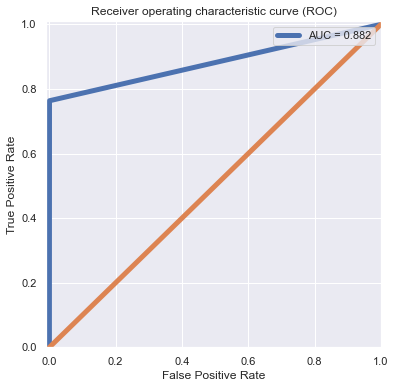

In [148]:
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

In [149]:
target = 'Class'
pca_comp = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount', 'Time']

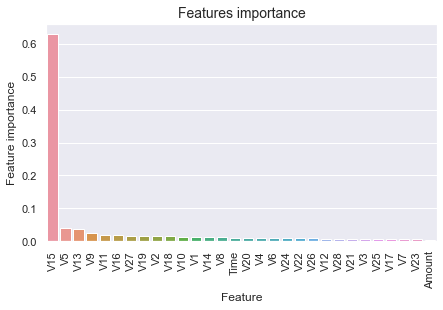

In [150]:
tmp = pd.DataFrame({'Feature': pca_comp, 'Feature importance': model_xgb_smote.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  